In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create a synthetic dataset
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

In [6]:
# Implement K-Means from scratch
def k_means(X, K, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(range(len(X)), K, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        
        # Update centroids based on the mean of assigned points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

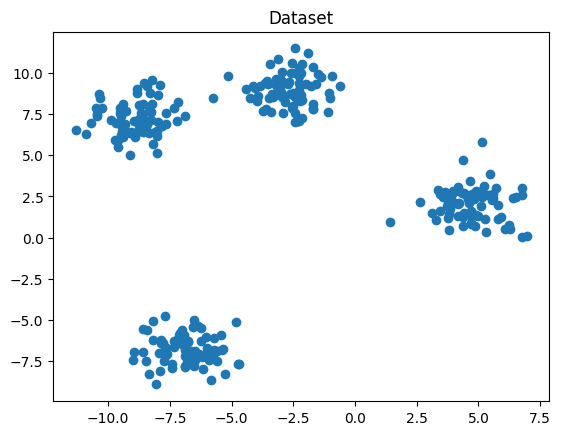

In [7]:
# Visualize the dataset
plt.scatter(data[:, 0], data[:, 1])
plt.title("Dataset")
plt.show()



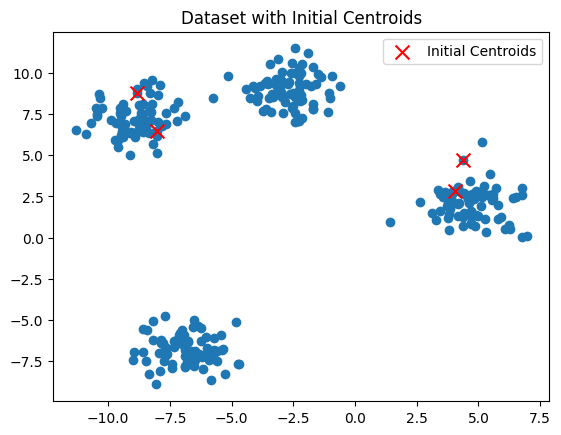

In [8]:
# Plot the initial centroids
K = 4
initial_centroids = data[np.random.choice(range(len(data)), K, replace=False)]
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=100, label='Initial Centroids')
plt.title("Dataset with Initial Centroids")
plt.legend()
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

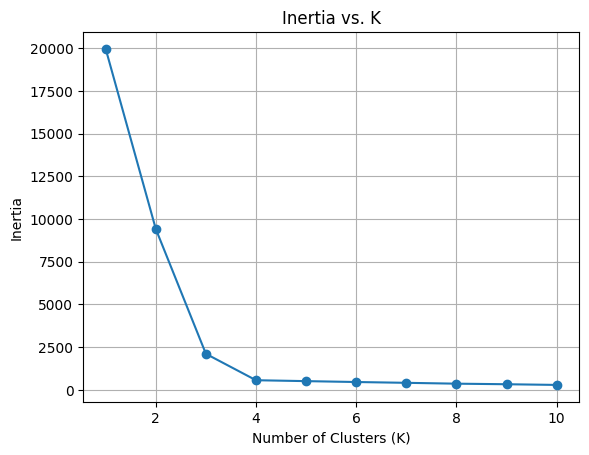

In [9]:
# Implement a method to calculate inertia for different values of K
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to determine an appropriate K
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Inertia vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Steps Taken:**

*Creating a Synthetic Dataset:*

-Start by generating a synthetic dataset with 300 samples and 4 clusters (centers) using scikit-learn's make_blobs function. This dataset is randomly generated and serves as our example data for K-Means clustering.

*Implementing K-Means from Scratch:*

-Implement a simplified version of the K-Means algorithm from scratch. The key steps in K-Means are:
1-Random initialization of cluster centroids.
2-Iteratively assigning data points to the nearest centroid.
3-Recalculating centroids as the mean of the assigned data points.
4-Repeating the assignment and update steps until convergence (when centroids no longer change significantly).

*Visualizing the Dataset:*

-Plot the synthetic dataset using matplotlib to visualize the data points. This helps us understand the distribution of data before applying K-Means.

*Plotting the Initial Centroids:*

-Visualize the initial centroids chosen by the K-Means algorithm. This provides insight into where the algorithm begins and how well it converges to the actual cluster centers.

*Calculating Inertia for Different K Values:*

-Loop through a range of K values (from 1 to 10) to demonstrate how the sum of squared distances (inertia) changes as we vary the number of clusters (K).
-For each K, we use scikit-learn's KMeans to fit the data and calculate the inertia. Inertia is a measure of how tightly the data points are clustered around their centroids.

*Plotting Inertia vs. K:*

-We plot the inertia values for different K values, which helps us identify the appropriate number of clusters (K). The "elbow" point in the plot is typically used as a heuristic to determine the optimal K.

**Results Obtained:**

-The synthetic dataset consists of four well-separated clusters, making it suitable for K-Means clustering.

-The initial centroids (red 'x' markers) are randomly selected. In practice, K-Means starts with these initial centroids and iteratively updates them to find the final cluster centers.

-The "Inertia vs. K" plot shows a decreasing trend in inertia as K increases. As K grows, clusters become smaller, and data points become closer to their centroids, resulting in a lower inertia value.

**Interpretation of Findings:**

*Visualizing the Dataset:*

-The dataset is visually divided into four distinct clusters, which align with the four centers used to generate it.

*Initial Centroids:*

-The initial centroids serve as starting points for the K-Means algorithm. It's important to note that the algorithm may not always converge to the optimal solution, and the choice of initial centroids can impact the final clustering result.

*Inertia vs. K:*

-The plot exhibits a clear "elbow point" or inflection point, indicating that the rate of decrease in inertia slows down significantly beyond a certain K value. This suggests that K=4 is an appropriate choice for the number of clusters in the dataset.